## Exploration

In [ ]:
import kagglehub

path = kagglehub.dataset_download("sarahjeffreson/featured-spotify-artiststracks-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 5.02M/5.02M [00:00<00:00, 5.35MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sarahjeffreson/featured-spotify-artiststracks-with-metadata/versions/2


In [ ]:
import pandas as pd

file_path = path + "/CLEANED_featured_Spotify_artist_info.csv"
df = pd.read_csv(file_path)

df

,dates,ids,names,monthly_listeners,popularity,followers,genres,first_release,last_release,num_releases,num_tracks,playlists_found,feat_track_ids
0,2024-04-01,01XYiBYaoMJcNhPokrg0l0,stayc,3049521.0,63,1782552,"k-pop, k-pop girl group",2020,2024,14,2,K-Pop ON! (온),0y0uzuB1HxljAY2j0tLETp
1,2024-04-01,099toTcKJoywTosZr2hHjy,langhorne slim,1060777.0,51,163686,"anti-folk, indie folk, modern folk rock, new a...",2008,2023,20,3,Sunrise Run,40rjypnguxfhPy4Bbv5SWc
2,2024-04-01,0BvkDsjIUla7X0k6CSWh1I,luke bryan,10460890.0,76,8487512,"contemporary country, country, country road, m...",2007,2023,20,6,Sunrise Run,386DfI5sZ0eJi1i6SZVqLw
3,2024-04-01,0CmvFWTX9zmMNCUi6fHtAx,the boyz,1285501.0,60,2845229,"k-pop, k-pop boy group",2020,2024,20,6,K-Pop ON! (온),6MEtGumgTXWquxH35osvEC
4,2024-04-01,0FRUZvZNPzM3YJMABJxf2K,wendy,1885379.0,62,907553,"k-pop, korean pop",2015,2024,20,2,K-Pop ON! (온),7b8SkcdeiTuo6FQXdPgPWW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20246,2024-05-09,319yZVtYM9MBGqmSQnMyY6,carole king,3834897.0,58,1530708,"brill building pop, classic rock, folk, folk r...",1975,2023,20,12,Mother's Day,"5htNlXFlMI6RMBHhJuGJJm, 1wsXDq84XjC5bpaomBn1P6"
20247,2024-05-09,5IaDEj02UeuU9YQSunGWgG,costa titch,399938.0,41,103807,south african trap,2020,2023,20,1,Afro Bars,"3a4MsohOkHxzYIaS27IhXm, 3a4MsohOkHxzYIaS27IhXm"
20248,2024-05-09,2YkhzcYyxJvtl5W6pY0PuF,camo,295769.0,48,78189,korean r&b,2020,2024,9,4,KrOWN,"6AcT7whSpUEaCncx24QFml, 6AcT7whSpUEaCncx24QFml..."
20249,2024-05-09,6AVe04cz8yEaSIVUbm2o02,maya randle,80247.0,33,1901,house,2022,2024,9,1,Fresh Finds,4TGQC8Yscxh6f9KJLlwktA


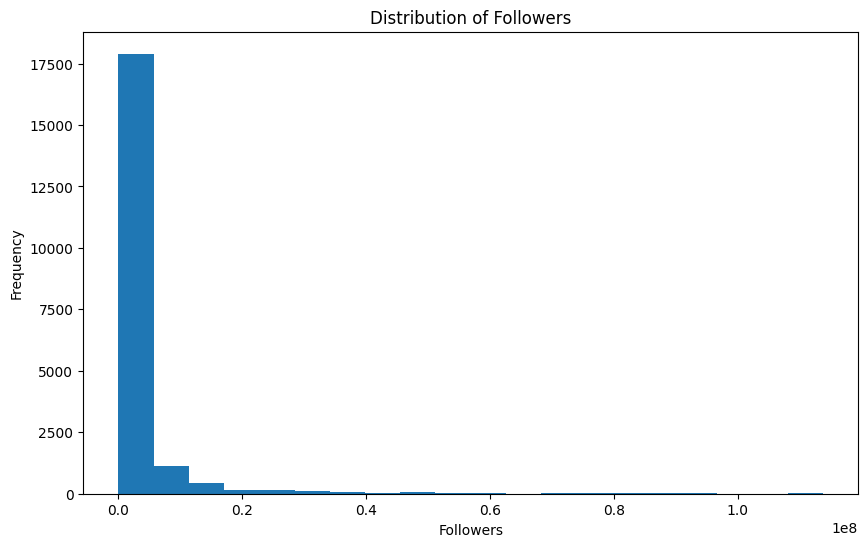

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['followers'], bins=20)
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Followers')
plt.show()

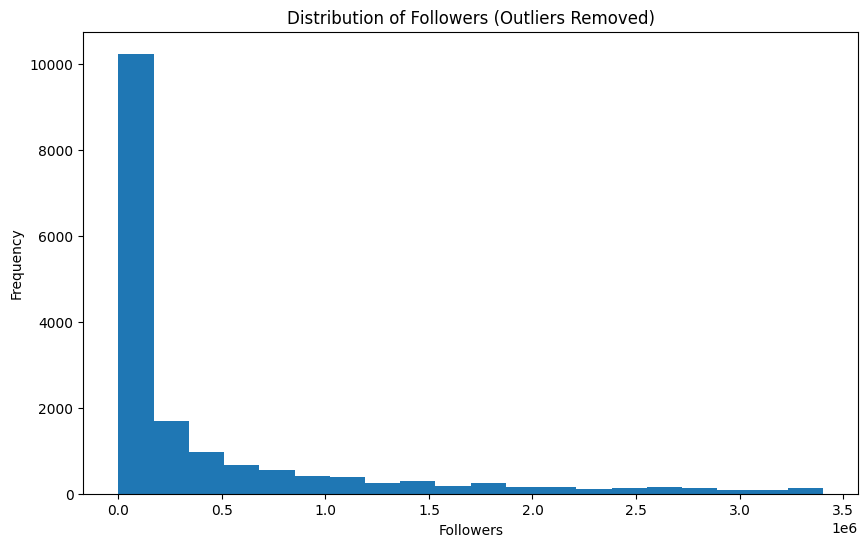

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("sarahjeffreson/featured-spotify-artiststracks-with-metadata")

file_path = path + "/CLEANED_featured_Spotify_artist_info.csv"
df = pd.read_csv(file_path)

Q1 = df['followers'].quantile(0.25)
Q3 = df['followers'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['followers'] >= lower_bound) & (df['followers'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.hist(df_no_outliers['followers'], bins=20)
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Followers (Outliers Removed)')
plt.show()

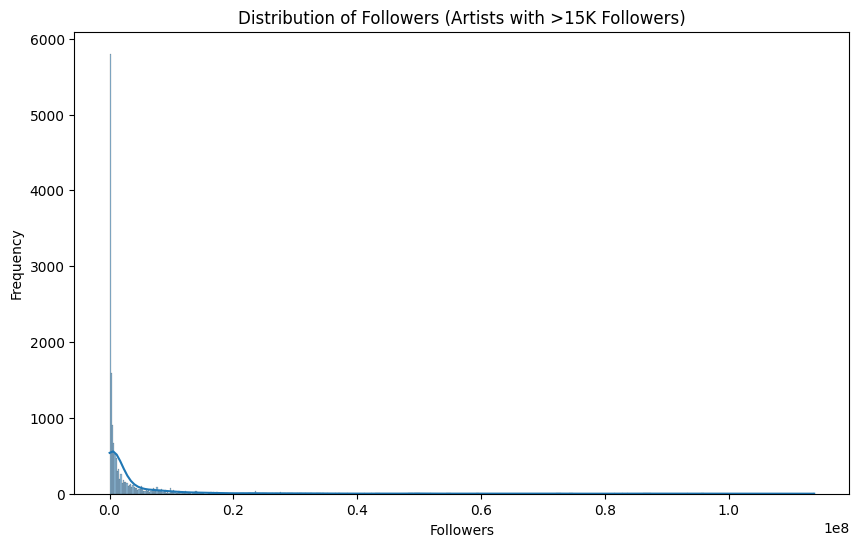

Mean followers: 3769150.4570309953
5th percentile followers: 23477.2
Median followers: 455535.0
95th percentile followers: 17311543.4


In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = kagglehub.dataset_download("sarahjeffreson/featured-spotify-artiststracks-with-metadata")

file_path = path + "/CLEANED_featured_Spotify_artist_info.csv"

df = pd.read_csv(file_path)

df_filtered = df[df['followers'] > 15000]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['followers'], kde=True)
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Followers (Artists with >15K Followers)')
plt.show()


mean_followers = df_filtered['followers'].mean()
median_followers = df_filtered['followers'].median()
percentile_33 = df_filtered['followers'].quantile(0.05)
percentile_66 = df_filtered['followers'].quantile(0.95)

print(f"Mean followers: {mean_followers}")
print(f"5th percentile followers: {percentile_33}")
print(f"Median followers: {median_followers}")
print(f"95th percentile followers: {percentile_66}")

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("sarahjeffreson/featured-spotify-artiststracks-with-metadata")

file_path = path + "/CLEANED_featured_Spotify_artist_info.csv"

df = pd.read_csv(file_path)

mean_followers = df['followers'].mean()
median_followers = df['followers'].median()
percentile_33 = df['followers'].quantile(0.33)
percentile_66 = df['followers'].quantile(0.66)

print(f"Mean followers: {mean_followers}")
print(f"Median followers: {median_followers}")
print(f"33rd percentile followers: {percentile_33}")
print(f"66th percentile followers: {percentile_66}")

Mean followers: 2853237.79186213
Median followers: 163448.0
33rd percentile followers: 38709.0
66th percentile followers: 635652.0


## Aquire Artists

In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = kagglehub.dataset_download("sarahjeffreson/featured-spotify-artiststracks-with-metadata")
file_path = path + "/CLEANED_featured_Spotify_artist_info.csv"
df = pd.read_csv(file_path)

In [ ]:
# Filter out any artsits with less than 15000 followers and filter out duplicates
df = df.drop_duplicates(subset=["ids"])
df_filtered = df[df['followers'] > 15000]

# These values are the 5th, 50th, and 95th percentiles of the number of followers
# fiftieth_percentile = int(df['followers'].median())
one_third_percentile = int(df_filtered['followers'].quantile(0.3166666666666))
two_thirds_percentile = int(df_filtered['followers'].quantile(0.633333333333))
top_five_percentile = int(df_filtered['followers'].quantile(0.95))

df_small = df_filtered[df_filtered['followers'] <= one_third_percentile]
df_medium = df_filtered[(df_filtered['followers'] >= one_third_percentile) & (df_filtered['followers'] <= two_thirds_percentile)]
df_large = df_filtered[(df_filtered['followers'] >= two_thirds_percentile) & (df_filtered['followers'] <= top_five_percentile)]
df_xlarge = df_filtered[(df_filtered['followers'] >= top_five_percentile)]


print(f"1/3 percentile: {one_third_percentile}")
print(f"2/3 percentile: {two_thirds_percentile}")

# print(f"Fifth percentile: {fifth_percentile}")
# print(f"Fiftieth percentile: {fiftieth_percentile}")
# print(f"Ninty-fifth percentile: {ninety_fifth_percentile}")

1/3 percentile: 85924
2/3 percentile: 430536


In [ ]:
len(df_large)

1705

In [ ]:
artist_list_small = df_small['ids'].tolist()
artist_list_medium = df_medium['ids'].tolist()
artist_list_large = df_large['ids'].tolist()
artist_list_xlarge = df_xlarge['ids'].tolist()

print(len(artist_list_small))
print(len(artist_list_medium))
print(len(artist_list_large))
print(len(artist_list_xlarge))

print(len(set(artist_list_small)))
print(len(set(artist_list_medium)))
print(len(set(artist_list_large)))
print(len(set(artist_list_xlarge)))

1706
1705
1705
270
1706
1705
1705
270


In [ ]:
import random

def choose_random_artists(artist_list, num_artists=10):
  if len(artist_list) < num_artists:
    return artist_list
  return random.sample(artist_list, num_artists)


# select 10 random artists from each category (small, medium, large)
random_small_artists = choose_random_artists(artist_list_small)
random_medium_artists = choose_random_artists(artist_list_medium)
random_large_artists = choose_random_artists(artist_list_large)
random_xlarge_artists = choose_random_artists(artist_list_xlarge)

print("Random Small Artists:", random_small_artists)
print("Random Medium Artists:", random_medium_artists)
print("Random Large Artists:", random_large_artists)
print("Random X-Large Artists:", random_xlarge_artists)

Random Small Artists: ['4iyGL0YdGnDUVbmuca9e2G', '0Lt05xaSe2ACmAiSkIdcSm', '1wJNeTGqvB8WVYak3HC3pk', '31klRMTQJ94NrxwIZJwJBY', '72NhFAGG5Pt91VbheJeEPG', '1VN3hs1Ra3vupNT3zN3baC', '5o2KBzYUFierWmBhSemAhq', '05MbxRG8XyYmFhv7ZUMylc', '0gQ38ZwplqsXARPDmNIL9c', '4ONwFcI8RGvYMG1vEIdS11']
Random Medium Artists: ['60llzVzPwr1pfNy7qerr7y', '0CdbG1eHVjqjkQsGoH2u1V', '7CvTknweLr9feJtRGrpDBy', '6HCIRVlJ8tvmKPAtFnxyFg', '3bLSAQPeix7Xm2e5Gtn48R', '0rW6fVd3yuW2CF2sLYWQtE', '0DxPHf2flBAcV2SnZPg3SV', '0nnYdIpahs41QiZ9MWp5Wx', '5z9wLR0RGBcWMXr4fCZW0K', '0kRAVpQhUUArA8UnYwEdeZ']
Random Large Artists: ['2lMy93l58wzjh8DepKL814', '4qWnlmXWuGv2TtuxtIWlJX', '6HhnhnxLsowYuuejvku0Bz', '2hlmm7s2ICUX0LVIhVFlZQ', '0h9smro0z3HqUbD94jotU8', '3r17AfJCCUqC9Lf0OAc73G', '2HHmvvSQ44ePDH7IKVzgK0', '28hJdGN1Awf7u3ifk2lVkg', '7rkW85dBwwrJtlHRDkJDAC', '6FkhUhUwSPl3mGB6mmE8wn']
Random X-Large Artists: ['0hCNtLu0JehylgoiP8L4Gh', '69GGBxA162lTqCwzJG5jLp', '0ErzCpIMyLcjPiwT4elrtZ', '3RNrq3jvMZxD9ZyoOZbQOD', '7vXDAI8JwjW531ouMGbf

## Spotify API Access

In [ ]:
client_id = "37b8f63013e04cf59e3d521be65eb5f4"
client_secret = "fdd9de82df3a4e4cb1a3bb283bcb6b87"

In [ ]:
!pip install spotipy

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# https://spotipy.readthedocs.io/en/2.24.0/

In [ ]:
def getArtist(artist_id):
  spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
  artist = spotify.artist(artist_id)
  return artist

In [ ]:
def create_artist_edges(artist_list):
  spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
  edges = []
  for artist_id in artist_list:
    try:
      related_artists = spotify.artist_related_artists(artist_id)
      if related_artists and related_artists['artists']:
        for related_artist in related_artists['artists']:
          edges.append((getArtist(artist_id), getArtist(related_artist['id'])))
    except spotipy.SpotifyException as e:
      print(f"Error fetching related artists for {artist_id}: {e}")

  return edges

def create_artist_name_edges(artist_list):
  spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
  edges = []
  for artist_id in artist_list:
    print("Trying artist ID:", artist_id)
    try:
      related_artists = spotify.artist_related_artists(artist_id)
      if related_artists and related_artists['artists']:
        for related_artist in related_artists['artists']:
          edges.append((getArtist(artist_id)["name"], getArtist(related_artist['id'])["name"]))
    except spotipy.SpotifyException as e:
      print(f"Error fetching related artists for {artist_id}: {e}")

  return edges

In [ ]:
followers_dict = {}

for i, artist in df_filtered.iterrows():
  followers_dict[artist["names"]] = {"size": artist["followers"]/10000}

print(followers_dict)

{'stayc': {'size': 178.2552}, 'langhorne slim': {'size': 16.3686}, 'luke bryan': {'size': 848.7512}, 'the boyz': {'size': 284.5229}, 'wendy': {'size': 90.7553}, 'mad season': {'size': 59.8724}, 'little may': {'size': 5.1747}, 'chris cornell': {'size': 212.7586}, 'j-hope': {'size': 1718.7002}, 'tomorrow x together': {'size': 971.8213}, 'temple of the dog': {'size': 122.7103}, 'delta rae': {'size': 9.1258}, 'the head and the heart': {'size': 107.2496}, 'skin yard': {'size': 3.1666}, 'gaeko': {'size': 13.9091}, 'kopecky': {'size': 2.1906}, 'vance joy': {'size': 302.3746}, 'the avett brothers': {'size': 97.4758}, 'yoon mirae': {'size': 28.4513}, 'babymonster': {'size': 81.2906}, 'j.y. park': {'size': 15.3494}, 'green river': {'size': 9.0197}, 'max': {'size': 89.2321}, 'nct dream': {'size': 760.8002}, 'pearl jam': {'size': 859.4757}, 'delta spirit': {'size': 11.9651}, 'dinosaur jr.': {'size': 52.1457}, 'nmixx': {'size': 262.7521}, '(g)i-dle': {'size': 878.5108}, 'sponge': {'size': 12.1779},

In [ ]:
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))
ra = getArtist("0TnOYISbd1XYRBk9myaseg")
print(ra)


{'external_urls': {'spotify': 'https://open.spotify.com/artist/0TnOYISbd1XYRBk9myaseg'}, 'followers': {'href': None, 'total': 11018071}, 'genres': ['dance pop', 'miami hip hop', 'pop'], 'href': 'https://api.spotify.com/v1/artists/0TnOYISbd1XYRBk9myaseg', 'id': '0TnOYISbd1XYRBk9myaseg', 'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5eb4051627b19277613e0e62a34', 'height': 640, 'width': 640}, {'url': 'https://i.scdn.co/image/ab676161000051744051627b19277613e0e62a34', 'height': 320, 'width': 320}, {'url': 'https://i.scdn.co/image/ab6761610000f1784051627b19277613e0e62a34', 'height': 160, 'width': 160}], 'name': 'Pitbull', 'popularity': 86, 'type': 'artist', 'uri': 'spotify:artist:0TnOYISbd1XYRBk9myaseg'}


In [ ]:
# Example usage (using a small subset of artists for demonstration)
# edges = create_artist_name_edges(random_small_artists)
print(getArtist("0hCNtLu0JehylgoiP8L4Gh"))
edges = create_artist_name_edges(random_xlarge_artists)

print("Artist Edges:", edges)

ERROR:spotipy.client:HTTP Error for GET to https://api.spotify.com/v1/artists/0hCNtLu0JehylgoiP8L4Gh/related-artists with Params: {} returned 404 due to Not Found
ERROR:spotipy.client:HTTP Error for GET to https://api.spotify.com/v1/artists/69GGBxA162lTqCwzJG5jLp/related-artists with Params: {} returned 404 due to Not Found
ERROR:spotipy.client:HTTP Error for GET to https://api.spotify.com/v1/artists/0ErzCpIMyLcjPiwT4elrtZ/related-artists with Params: {} returned 404 due to Not Found
ERROR:spotipy.client:HTTP Error for GET to https://api.spotify.com/v1/artists/3RNrq3jvMZxD9ZyoOZbQOD/related-artists with Params: {} returned 404 due to Not Found
ERROR:spotipy.client:HTTP Error for GET to https://api.spotify.com/v1/artists/7vXDAI8JwjW531ouMGbfcp/related-artists with Params: {} returned 404 due to Not Found
ERROR:spotipy.client:HTTP Error for GET to https://api.spotify.com/v1/artists/0VRj0yCOv2FXJNP47XQnx5/related-artists with Params: {} returned 404 due to Not Found
ERROR:spotipy.client:H

{'external_urls': {'spotify': 'https://open.spotify.com/artist/0hCNtLu0JehylgoiP8L4Gh'}, 'followers': {'href': None, 'total': 32844499}, 'genres': ['hip pop', 'pop', 'queens hip hop', 'rap'], 'href': 'https://api.spotify.com/v1/artists/0hCNtLu0JehylgoiP8L4Gh', 'id': '0hCNtLu0JehylgoiP8L4Gh', 'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5eb07a50f0a9a8f11e5a1102cbd', 'height': 640, 'width': 640}, {'url': 'https://i.scdn.co/image/ab6761610000517407a50f0a9a8f11e5a1102cbd', 'height': 320, 'width': 320}, {'url': 'https://i.scdn.co/image/ab6761610000f17807a50f0a9a8f11e5a1102cbd', 'height': 160, 'width': 160}], 'name': 'Nicki Minaj', 'popularity': 87, 'type': 'artist', 'uri': 'spotify:artist:0hCNtLu0JehylgoiP8L4Gh'}
Trying artist ID: 0hCNtLu0JehylgoiP8L4Gh
Error fetching related artists for 0hCNtLu0JehylgoiP8L4Gh: http status: 404, code:-1 - https://api.spotify.com/v1/artists/0hCNtLu0JehylgoiP8L4Gh/related-artists:
 Not Found, reason: None
Trying artist ID: 69GGBxA162lTqCwzJG5jLp
E

In [ ]:
!pip install gravis
import gravis as gv
import networkx as nx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.1/659.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
G = nx.DiGraph()
G.add_edges_from(edges)

# elist = [(artist, related), (artist, related), (artist, related), (artist, related)]
# G.add_edges_from(elist)

# centrality calculation
centrality = nx.algorithms.degree_centrality(G)

# community detection
communities = nx.algorithms.community.greedy_modularity_communities(G)

# Set node attributes for size
#nx.set_node_attributes(G, {1: {'size': 100}, 2: {'size': 200}, 3: {'size': 300}})

# assignment of node sizes
nx.set_node_attributes(G, centrality, 'size')

# Assignment of node colors
colors = ['red', 'blue', 'green', 'orange', 'pink']
for community, color in zip(communities, colors):
    for node in community:
        G.nodes[node]['color'] = color

gv.d3(G, use_node_size_normalization=True, node_size_normalization_max=30,
      use_edge_size_normalization=True, edge_size_data_source='weight', edge_curvature=0.3)

In [ ]:
G2 = nx.DiGraph()
G2.add_edges_from(edges)

# Set node attributes for size
nx.set_node_attributes(G2, followers_dict)

# community detection
communities = nx.algorithms.community.greedy_modularity_communities(G2)

# Assignment of node colors
colors = ['red', 'blue', 'green', 'orange', 'pink']
for community, color in zip(communities, colors):
    for node in community:
        G2.nodes[node]['color'] = color

gv.d3(G2, use_node_size_normalization=True, node_size_normalization_max=30,
      use_edge_size_normalization=True, edge_size_data_source='weight', edge_curvature=0)

###YouTube Music API

In [ ]:
from ytmusicapi import YTMusic

yt = YTMusic('oauth.json')

ModuleNotFoundError: No module named 'ytmusicapi'